# Import libraries

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import json
from pandas.io.json import json_normalize

#Setting to see all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Import data

In [2]:
#Read in the data (covid cases)

covid_csv = r'C:\Users\Huawei\Documents\Ever Medical Tech\diag_covid.csv'
non_covid_csv = r'C:\Users\Huawei\Documents\Ever Medical Tech\diag_not_covid.csv'
df = pd.read_csv(covid_csv)
df_non = pd.read_csv(non_covid_csv)

In [3]:
#Data types

df.dtypes

visitid              int64
network             object
diag_icd10          object
diag_type            int64
diag_icd10name      object
diag                object
cid                 object
class               object
eventdatetime       object
hospcode           float64
diagtext           float64
visitvital          object
labresults          object
drugs               object
billingitems        object
patientdob          object
visitage             int64
patientsexname      object
patientareacode      int64
dtype: object

In [4]:
df_non.dtypes

visitid              int64
network             object
diag_icd10          object
diag_type            int64
diag_icd10name      object
diag                object
cid                 object
class               object
eventdatetime       object
hospcode           float64
diagtext            object
visitvital          object
labresults          object
drugs               object
billingitems        object
xrays               object
patientdob          object
visitage             int64
patientsexname      object
patientaddress      object
patientareacode      int64
dtype: object

# Cleaning data

In [5]:
#Cleaning data

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing))

visitid - 0.0%
network - 0.0%
diag_icd10 - 0.0%
diag_type - 0.0%
diag_icd10name - 0.0%
diag - 0.0%
cid - 0.0%
class - 0.0%
eventdatetime - 0.0%
hospcode - 0.097%
diagtext - 1.0%
visitvital - 0.0%
labresults - 0.0%
drugs - 0.0%
billingitems - 0.0%
patientdob - 0.0%
visitage - 0.0%
patientsexname - 0.0%
patientareacode - 0.0%


In [6]:
for col in df_non.columns:
    missing = np.mean(df_non[col].isnull())
    print('{} - {}%'.format(col, missing))

visitid - 0.0%
network - 0.0%
diag_icd10 - 0.0%
diag_type - 0.0%
diag_icd10name - 0.0%
diag - 0.0%
cid - 0.0%
class - 0.0%
eventdatetime - 0.0%
hospcode - 0.012%
diagtext - 0.982%
visitvital - 0.0%
labresults - 0.0%
drugs - 0.0%
billingitems - 0.0%
xrays - 0.0%
patientdob - 0.0%
visitage - 0.0%
patientsexname - 0.001%
patientaddress - 0.0%
patientareacode - 0.0%


In [7]:
df['hospcode'] = df['hospcode'].fillna(0)
df['hospcode'] = df['hospcode'].astype('int64')
del df['diagtext']
df.head()

,visitid,network,diag_icd10,diag_type,diag_icd10name,diag,cid,class,eventdatetime,hospcode,visitvital,labresults,drugs,billingitems,patientdob,visitage,patientsexname,patientareacode
0,3575616,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""u071"", ""diagType"": ""2"", ""icd10Name""...",fee38ffa10014a145301403e4be6da8421c3186ed8b400...,IMP,2022-03-17 13:40:56,10856,{},[],"[{""qty"":""1"",""drugNondugName"":""มะแว้ง - -"",""dru...","[{""hospCode"":""10856"",""orderNo"":""520174"",""icode...",1973-05-17,48,F,240901
1,3575620,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""u071"", ""diagType"": ""2"", ""icd10Name""...",9ec6c5274137c976e864de7227a07cd1fce2a1bcba95e9...,IMP,2022-03-17 13:47:54,10856,{},[],"[{""qty"":""1"",""drugNondugName"":""มะแว้ง - -"",""dru...","[{""hospCode"":""10856"",""orderNo"":""520172"",""icode...",1988-10-28,33,M,370601
2,3575633,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""u071"", ""diagType"": ""2"", ""icd10Name""...",fd8a6f395a6de95ab50c46bde27be9e9256db1d3d6e21c...,IMP,2022-03-17 13:34:13,10856,{},[],"[{""qty"":""1"",""drugNondugName"":""ยาแก้ไอผสมมะขามป...","[{""hospCode"":""10856"",""orderNo"":""520087"",""icode...",1984-09-22,37,F,240903
3,3575655,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""U071"", ""diagType"": ""2"", ""icd10Name""...",1def8eeb3b3cb31fdc57bfd870e93392cff9df97404342...,IMP,2022-03-17 11:33:56,10856,{},"[{""labHeadData"":{""labOrderNumber"":""6475295"",""f...","[{""qty"":""1"",""drugNondugName"":""ยาแก้ไอผสมมะขามป...","[{""hospCode"":""10856"",""orderNo"":""520092"",""icode...",1989-12-27,32,M,311404
4,3575829,CCS,U071,2,2019 NCOV VIRUS DISEASE,"{""icd10"": ""U071"", ""diagType"": ""2"", ""icd10Name""...",642d1dacaf3400d4ef7e38baf52650ab4a4481d5124d34...,IMP,2022-03-17 20:25:00,10854,{},"[{""labHeadData"":{""labOrderNumber"":""10541758"",""...","[{""qty"":""0"",""drugNondugName"":""Favipiravir 200 ...","[{""hospCode"":""10854"",""orderNo"":""1616787"",""icod...",1941-01-01,81,F,240601


In [8]:
df_non['hospcode'] = df_non['hospcode'].fillna(0)
df_non['hospcode'] = df_non['hospcode'].astype('int64')
del df_non['diagtext']
df_non.head()

,visitid,network,diag_icd10,diag_type,diag_icd10name,diag,cid,class,eventdatetime,hospcode,visitvital,labresults,drugs,billingitems,xrays,patientdob,visitage,patientsexname,patientaddress,patientareacode
0,3607765,SMPK,K750,1,ABSCESS OF LIVER,"{""icd10"": ""K750"", ""diagType"": ""1"", ""icd10Name""...",d1357ea7455aace803681d9bb10e57cf3f33127093bf4b...,AMB,2021-04-27 00:41:58,10753,"{""bpd"":""68"",""bps"":""118"",""bw"":""65.5"",""cc"":""สถาน...",[],"[{""qty"":""60"",""drugNondugName"":""Vitamin B Compl...","[{""billingStatus"":""PROCESSING"",""hospCode"":""107...",[],1963-05-19,57,M,"[{""road"": """", ""amppart"": ""03"", ""chwpart"": ""11""...",110308
1,3607765,SMPK,K922,2,"GASTROINTESTINAL HAEMORRHAGE, UNSPECIFIED","{""icd10"": ""K922"", ""diagType"": ""2"", ""icd10Name""...",d1357ea7455aace803681d9bb10e57cf3f33127093bf4b...,AMB,2021-04-27 00:41:58,10753,"{""bpd"":""68"",""bps"":""118"",""bw"":""65.5"",""cc"":""สถาน...",[],"[{""qty"":""60"",""drugNondugName"":""Vitamin B Compl...","[{""billingStatus"":""PROCESSING"",""hospCode"":""107...",[],1963-05-19,57,M,"[{""road"": """", ""amppart"": ""03"", ""chwpart"": ""11""...",110308
2,3607766,SMPK,C509,1,"BREAST MALIGNANT NEOPLASM, UNSPECIFIED","{""icd10"": ""C509"", ""diagType"": ""1"", ""icd10Name""...",5dcef35c228733d784795850b22a365f1ce72a97492e10...,AMB,2019-02-05 02:12:14,10685,"{""bpd"":""77"",""bps"":""128"",""bw"":""73.7"",""cc"":""มาตร...","[{""labHeadData"":{""labOrderNumber"":""4634221"",""f...",[],"[{""billingStatus"":""PROCESSING"",""hospCode"":""106...",[],1959-01-13,60,F,"[{""road"": ""เทพารักษ์"", ""amppart"": ""06"", ""chwpa...",110601
3,3607766,SMPK,E059,2,"THYROTOXICOSIS, UNSPECIFIED","{""icd10"": ""E059"", ""diagType"": ""2"", ""icd10Name""...",5dcef35c228733d784795850b22a365f1ce72a97492e10...,AMB,2019-02-05 02:12:14,10685,"{""bpd"":""77"",""bps"":""128"",""bw"":""73.7"",""cc"":""มาตร...","[{""labHeadData"":{""labOrderNumber"":""4634221"",""f...",[],"[{""billingStatus"":""PROCESSING"",""hospCode"":""106...",[],1959-01-13,60,F,"[{""road"": ""เทพารักษ์"", ""amppart"": ""06"", ""chwpa...",110601
4,3607766,SMPK,E149,2,UNSPECIFIED DIABETES MELLITUS AT WITHOUT COMPL...,"{""icd10"": ""E149"", ""diagType"": ""2"", ""icd10Name""...",5dcef35c228733d784795850b22a365f1ce72a97492e10...,AMB,2019-02-05 02:12:14,10685,"{""bpd"":""77"",""bps"":""128"",""bw"":""73.7"",""cc"":""มาตร...","[{""labHeadData"":{""labOrderNumber"":""4634221"",""f...",[],"[{""billingStatus"":""PROCESSING"",""hospCode"":""106...",[],1959-01-13,60,F,"[{""road"": ""เทพารักษ์"", ""amppart"": ""06"", ""chwpa...",110601


In [9]:
#Fixing values

del df_non['diag_icd10']
df_non['diag_icd10'] = 'nonU071'

In [10]:
#Concat two tables

table = pd.concat([df, df_non])
table.head()

,visitid,network,diag_icd10,diag_type,diag_icd10name,diag,cid,class,eventdatetime,hospcode,visitvital,labresults,drugs,billingitems,patientdob,visitage,patientsexname,patientareacode,xrays,patientaddress
0,3575616,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""u071"", ""diagType"": ""2"", ""icd10Name""...",fee38ffa10014a145301403e4be6da8421c3186ed8b400...,IMP,2022-03-17 13:40:56,10856,{},[],"[{""qty"":""1"",""drugNondugName"":""มะแว้ง - -"",""dru...","[{""hospCode"":""10856"",""orderNo"":""520174"",""icode...",1973-05-17,48,F,240901,NaN,NaN
1,3575620,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""u071"", ""diagType"": ""2"", ""icd10Name""...",9ec6c5274137c976e864de7227a07cd1fce2a1bcba95e9...,IMP,2022-03-17 13:47:54,10856,{},[],"[{""qty"":""1"",""drugNondugName"":""มะแว้ง - -"",""dru...","[{""hospCode"":""10856"",""orderNo"":""520172"",""icode...",1988-10-28,33,M,370601,NaN,NaN
2,3575633,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""u071"", ""diagType"": ""2"", ""icd10Name""...",fd8a6f395a6de95ab50c46bde27be9e9256db1d3d6e21c...,IMP,2022-03-17 13:34:13,10856,{},[],"[{""qty"":""1"",""drugNondugName"":""ยาแก้ไอผสมมะขามป...","[{""hospCode"":""10856"",""orderNo"":""520087"",""icode...",1984-09-22,37,F,240903,NaN,NaN
3,3575655,CCS,U071,2,EMERGENCY USE OF U071,"{""icd10"": ""U071"", ""diagType"": ""2"", ""icd10Name""...",1def8eeb3b3cb31fdc57bfd870e93392cff9df97404342...,IMP,2022-03-17 11:33:56,10856,{},"[{""labHeadData"":{""labOrderNumber"":""6475295"",""f...","[{""qty"":""1"",""drugNondugName"":""ยาแก้ไอผสมมะขามป...","[{""hospCode"":""10856"",""orderNo"":""520092"",""icode...",1989-12-27,32,M,311404,NaN,NaN
4,3575829,CCS,U071,2,2019 NCOV VIRUS DISEASE,"{""icd10"": ""U071"", ""diagType"": ""2"", ""icd10Name""...",642d1dacaf3400d4ef7e38baf52650ab4a4481d5124d34...,IMP,2022-03-17 20:25:00,10854,{},"[{""labHeadData"":{""labOrderNumber"":""10541758"",""...","[{""qty"":""0"",""drugNondugName"":""Favipiravir 200 ...","[{""hospCode"":""10854"",""orderNo"":""1616787"",""icod...",1941-01-01,81,F,240601,NaN,NaN


# Covert to table

In [11]:
#Changing JSON string to Python dictionary

for col_name in ['diag','visitvital','labresults','drugs','billingitems']:
    for row_num in range(len(df[col_name])):
        df[col_name][row_num] = json.loads(df[col_name][row_num])
        
for col_name in ['diag','visitvital','labresults','drugs','billingitems']:
    for row_num in range(len(df_non[col_name])):
        df_non[col_name][row_num] = json.loads(df_non[col_name][row_num])

<ipython-input-11-f470b408a1f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row_num] = json.loads(df[col_name][row_num])
<ipython-input-11-f470b408a1f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non[col_name][row_num] = json.loads(df_non[col_name][row_num])


In [12]:
#Structing JSON data into a table
#Diag table

diagdata = pd.json_normalize(df['diag'])
diagdata_non = pd.json_normalize(df_non['diag'])
diagtable = pd.concat([diagdata, diagdata_non])

diagtable.head()

,icd10,diagType,icd10Name,diagTypeName
0,u071,2,Emergency use of U071,Comorbidity (โรคอื่นที่เป็นร่วมด้วย)
1,u071,2,Emergency use of U071,Comorbidity (โรคอื่นที่เป็นร่วมด้วย)
2,u071,2,Emergency use of U071,Comorbidity (โรคอื่นที่เป็นร่วมด้วย)
3,U071,2,Emergency use of U071,Comorbidity (โรคอื่นที่เป็นร่วมด้วย)
4,U071,2,2019 nCoV virus disease,Comorbidity (โรคอื่นที่เป็นร่วมด้วย)


In [13]:
#Visitvital table

visitvitallist = []
for x in range(len(df['visitvital'])):
    y = df['visitvital'][x]
    visitvitallist.append(y)
    
for x in range(len(df['visitvital'])):
    visitvitallist[x] = pd.json_normalize(visitvitallist[x])
    
for x in range(len(df['visitvital'])):
    visitvitallist[x]['diag_icd10'] = df['diag_icd10'][x]
    
visitvitaldata = visitvitallist[0]
for x in range(1, len(df['visitvital'])):
    visitvitaldata = visitvitaldata.append(visitvitallist[x], ignore_index = True)

visitvitallist_non = []
for x in range(len(df_non['visitvital'])):
    y = df_non['visitvital'][x]
    visitvitallist_non.append(y)
    
for x in range(len(df_non['visitvital'])):
    visitvitallist_non[x] = pd.json_normalize(visitvitallist_non[x])
    
for x in range(len(df_non['visitvital'])):
    visitvitallist_non[x]['diag_icd10'] = df_non['diag_icd10'][x]
    
visitvitaldata_non = visitvitallist_non[0]
for x in range(1, len(df_non['visitvital'])):
    visitvitaldata_non = visitvitaldata_non.append(visitvitallist_non[x], ignore_index = True)

visitvitaltable = pd.concat([visitvitaldata, visitvitaldata_non])

visitvitaltable.head()

,diag_icd10,bpd,bps,bw,cc,hr,pe,pulse,temperature,rr,height,fbs,bmi,waist,o2sat,prePainScore,postPainScore,peGa,peHeent,peHeart,peLung,peAb,peExt,peNeuro,peGaText,peHeentText,peHeartText,peLungText,peAbText,peNeuroText,peExtText,dtx1,dtx2,ptPriorityId,ptPriorityName,hpi,pmh,fh,sh,ros
0,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Labresults table

labresultslist = []
for x in range(len(df['labresults'])):
    y = df['labresults'][x]
    labresultslist.append(y)
    
for x in range(len(df['labresults'])):
    labresultslist[x] = pd.json_normalize(labresultslist[x])
    
for x in range(len(df['labresults'])):
    labresultslist[x]['diag_icd10'] = df['diag_icd10'][x]
    
labresultsdata = labresultslist[0]
for x in range(1, len(df['labresults'])):
    labresultsdata = labresultsdata.append(labresultslist[x], ignore_index = True)

labresultslist_non = []
for x in range(len(df_non['labresults'])):
    y = df_non['labresults'][x]
    labresultslist_non.append(y)
    
for x in range(len(df_non['labresults'])):
    labresultslist_non[x] = pd.json_normalize(labresultslist_non[x])
    
for x in range(len(df_non['labresults'])):
    labresultslist_non[x]['diag_icd10'] = df_non['diag_icd10'][x]
    
labresultsdata_non = labresultslist_non[0]
for x in range(1, len(df_non['labresults'])):
    labresultsdata_non = labresultsdata_non.append(labresultslist_non[x], ignore_index = True)

labresultstable = pd.concat([labresultsdata, labresultsdata_non])

labresultstable.head()

,diag_icd10,labReportData,labHeadData.labOrderNumber,labHeadData.formName,labHeadData.orderDepartment,labHeadData.departmentName,labHeadData.spclty,labHeadData.spcltyName,labHeadData.orderDateTime,labHeadData.resultNote,labHeadData.orderNote,labHeadData.department,labHeadData.receiveDateTime,labHeadData.labReceiveNumber,labHeadData.labReceive,labHeadData.confirmReport,labHeadData.reportDateTime,labHeadData.resultRtf,labHeadData.orderComputerName,labHeadData.doctorRequest
0,U071,"[{'orderDateTime': '2022-03-16T17:00:00.000Z',...",6475295,LAB รวม,047,จุดคัดกรอง ARI,01,อายุรกรรม,2022-03-17T04:48:17.000Z,[Antigen Chromatography COVID-19] ATK (Antig...,Transfer from OPD,IPD,2022-03-17T04:56:53.000Z,6475657,,Y,2022-03-17T05:30:51.000Z,Order Comment : \r\n\r\n[Antigen Chromatograp...,DESKTOP-5KI95K9,NaN
1,U071,"[{'orderDateTime': '2022-03-16T17:00:00.000Z',...",6475296,OUT LAB,047,จุดคัดกรอง ARI,01,อายุรกรรม,2022-03-17T04:52:15.000Z,,Transfer from OPD,IPD,2022-03-17T04:56:53.000Z,6475658,,Y,2022-03-18T02:04:08.000Z,Order Comment : \r\n\r\n,DESKTOP-5KI95K9,NaN
2,U071,"[{'orderDateTime': '2022-03-19T17:00:00.000Z',...",6475817,OUT LAB,009,ห้องชันสูตรโรค,01,อายุรกรรม,2022-03-20T03:01:56.000Z,,,IPD,2022-03-20T03:02:28.000Z,6476179,,Y,2022-03-20T16:42:35.000Z,Order Comment : \r\n\r\n,DESKTOP-LAB,NaN
3,U071,"[{'orderDateTime': '2022-03-16T17:00:00.000Z',...",10541758,BIOCHEMISTRY,104,ตึกพิเศษเฉลิมพระเกียรติชั้น 4,40,ผู้ป่วยใน อายุรกรรม,2022-03-17T14:13:27.000Z,,,IPD,2022-03-17T16:32:00.000Z,1131537,,Y,2022-03-17T17:36:51.000Z,Order Comment : \r\n\r\n,DESKTOP-6AG15AK,NaN
4,U071,"[{'orderDateTime': '2022-03-16T17:00:00.000Z',...",10541759,BIOCHEMISTRY,104,ตึกพิเศษเฉลิมพระเกียรติชั้น 4,40,ผู้ป่วยใน อายุรกรรม,2022-03-17T14:13:36.000Z,,,IPD,2022-03-17T16:31:59.000Z,1131536,,Y,2022-03-17T17:36:48.000Z,Order Comment : \r\n\r\n,DESKTOP-6AG15AK,NaN


In [15]:
#Drugs table

drugslist = []
for x in range(len(df['drugs'])):
    y = df['drugs'][x]
    drugslist.append(y)
    
for x in range(len(df['drugs'])):
    drugslist[x] = pd.json_normalize(drugslist[x])
    
for x in range(len(df['drugs'])):
    drugslist[x]['diag_icd10'] = df['diag_icd10'][x]
    
drugsdata = drugslist[0]
for x in range(1, len(df['drugs'])):
    drugsdata = drugsdata.append(drugslist[x], ignore_index = True)

drugslist_non = []
for x in range(len(df_non['drugs'])):
    y = df_non['drugs'][x]
    drugslist_non.append(y)
    
for x in range(len(df_non['drugs'])):
    drugslist_non[x] = pd.json_normalize(drugslist_non[x])
    
for x in range(len(df_non['drugs'])):
    drugslist_non[x]['diag_icd10'] = df_non['diag_icd10'][x]
    
drugsdata_non = drugslist_non[0]
for x in range(1, len(df_non['drugs'])):
    drugsdata_non = drugsdata_non.append(drugslist_non[x], ignore_index = True)

drugstable = pd.concat([drugsdata, drugsdata_non])

drugstable.head()

,qty,drugNondugName,drugNondugFullName,drugUsageEname,tmtCode,genericName,diag_icd10
0,1,มะแว้ง - -,มะแว้ง - - # 1,อมแก้เจ็บคอ 1,716997,มะแว้ง,U071
1,20,Paracetamol 500 mg เม็ด,Paracetamol 500 mg เม็ด # 20,รับประทาน 1 เม็ดทุก 4-6 ชั่วโมงเวลาปวดหรือมีไข้,402676,PARACETAMOL,U071
2,20,CPM 4 mg เม็ด,CPM 4 mg เม็ด # 20,รับประทาน ครั้งละ 1 เม็ด วันละ 3 เวลาหลังอาหาร...,689744,CHLORPHENIRAMINE,U071
3,1,ยาแก้ไอผสมมะขามป้อม 60 ml ขวด,ยาแก้ไอผสมมะขามป้อม 60 ml ขวด # 1,จิบเวลาไอ,,ยาแก้ไอผสมมะขามป้อม,U071
4,20,Ambroxol (NED) 30 mg เม็ด,Ambroxol (NED) 30 mg เม็ด # 20,รับประทาน ครั้งละ 1 เม็ด วันละ 3 เวลาหลังอาหาร...,383661,AMBROXOL,U071


In [16]:
#Billingitems table

billingitemslist = []
for x in range(len(df['billingitems'])):
    y = df['billingitems'][x]
    billingitemslist.append(y)
    
for x in range(len(df['billingitems'])):
    billingitemslist[x] = pd.json_normalize(billingitemslist[x])
    
for x in range(len(df['billingitems'])):
    billingitemslist[x]['diag_icd10'] = df['diag_icd10'][x]
    
billingitemsdata = billingitemslist[0]
for x in range(1, len(df['billingitems'])):
    billingitemsdata = billingitemsdata.append(billingitemslist[x], ignore_index = True)

billingitemslist_non = []
for x in range(len(df_non['billingitems'])):
    y = df_non['billingitems'][x]
    billingitemslist_non.append(y)
    
for x in range(len(df_non['billingitems'])):
    billingitemslist_non[x] = pd.json_normalize(billingitemslist_non[x])
    
for x in range(len(df_non['billingitems'])):
    billingitemslist_non[x]['diag_icd10'] = df_non['diag_icd10'][x]
    
billingitemsdata_non = billingitemslist_non[0]
for x in range(1, len(df_non['billingitems'])):
    billingitemsdata_non = billingitemsdata_non.append(billingitemslist_non[x], ignore_index = True)

billingitemstable = pd.concat([billingitemsdata, billingitemsdata_non])

billingitemstable.head()

,hospCode,orderNo,icode,qty,unitPrice,sumPrice,income,consultStatus,doctor,vstDateTime,rxDateTime,drugNondugName,drugNondugFullName,drugUsage,drugUsageEname,drugId24,tmtCode,itemsNoteText,itemsNoteUser,genericName,spUse,spName,iptOrderId,orderType,ward,orderLocked,financeNumber,payment_status,payStaffStatus,payStaff,payStaffName,items_type,diag_icd10,billingStatus,comments,itemsNoteDateTime,calcPrice,calcItemRule,finalPrice,calcTimestamp,calcCapExclude
0,10856,520174,1000419,1.0,10.0,10.0,03,0,00131,Thu Mar 17 2022 06:00:43 GMT+0700 (Indochina T...,Thu Mar 17 2022 13:40:56 GMT+0700 (Indochina T...,มะแว้ง - -,มะแว้ง - - # 1,1 OR4 อมแก้เจ็บคอ 1,อมแก้เจ็บคอ 1,420000005349120020382755,716997,,,มะแว้ง,,,,,,,,N,,,,,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10856,520174,3501997,1.0,12000.0,12000.0,01,0,00131,Thu Mar 17 2022 00:00:00 GMT+0700 (Indochina T...,Thu Mar 17 2022 13:40:56 GMT+0700 (Indochina T...,ค่าดูแลการให้บริการผู้ป่วยเตียงระดับ 0/HI/CI ต...,ค่าดูแลการให้บริการผู้ป่วยเตียงระดับ 0/HI/CI ต...,,,,,,,,,,,,,,,N,,,,,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10856,520174,1000264,20.0,1.0,20.0,03,0,00131,Thu Mar 17 2022 06:00:43 GMT+0700 (Indochina T...,Thu Mar 17 2022 13:40:56 GMT+0700 (Indochina T...,Paracetamol 500 mg เม็ด,Paracetamol 500 mg เม็ด # 20,1 prn q6 for fever/painรับประทาน 1 เม็ด ทุก6 ช...,รับประทาน 1 เม็ดทุก 4-6 ชั่วโมงเวลาปวดหรือมีไข้,100752000004493120381506,402676,,,PARACETAMOL,,,,,,,,N,,,,,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10856,520174,1000275,20.0,0.5,10.0,03,0,00131,Thu Mar 17 2022 06:00:43 GMT+0700 (Indochina T...,Thu Mar 17 2022 13:40:56 GMT+0700 (Indochina T...,CPM 4 mg เม็ด,CPM 4 mg เม็ด # 20,1 TID PC รับประทานครั้งละ 1 เม็ด วันละ 3 เวลา,รับประทาน ครั้งละ 1 เม็ด วันละ 3 เวลาหลังอาหาร...,100008190003471120381506,689744,,,CHLORPHENIRAMINE,,,,,,,,N,,,,,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10856,520174,1570045,1.0,15.0,15.0,03,0,00131,Thu Mar 17 2022 06:00:43 GMT+0700 (Indochina T...,Thu Mar 17 2022 13:40:56 GMT+0700 (Indochina T...,ยาแก้ไอผสมมะขามป้อม 60 ml ขวด,ยาแก้ไอผสมมะขามป้อม 60 ml ขวด # 1,0 OR2 จิบเวลาไอ,จิบเวลาไอ,420000001589502094782737,,,,ยาแก้ไอผสมมะขามป้อม,,,,,,,,N,,,,,U071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation

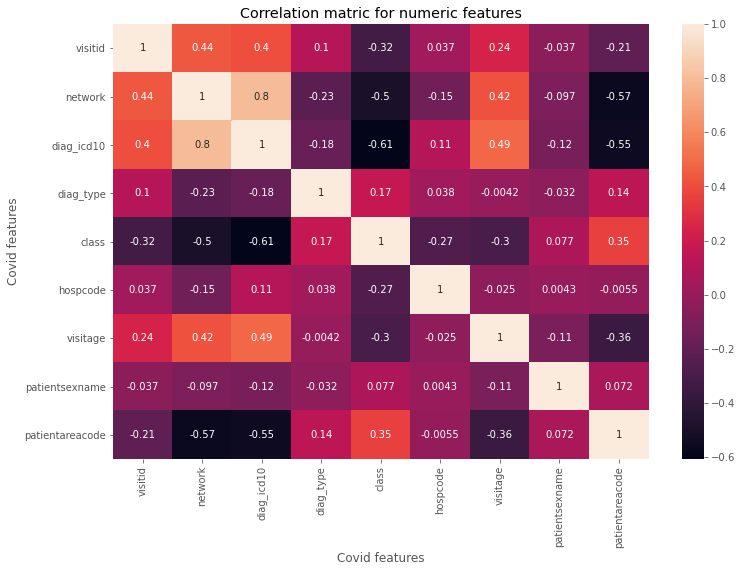

visitid            0.404889
network            0.800585
diag_icd10         1.000000
diag_type         -0.177459
class             -0.607601
hospcode           0.108910
visitage           0.489686
patientsexname    -0.117657
patientareacode   -0.554628
dtype: float64

In [17]:
#Correlation main table

df_numerized = table
for col_name in ['diag_icd10name','diag','cid','eventdatetime',
                 'visitvital','labresults','drugs','billingitems',
                 'patientdob','xrays','patientaddress']:
    del df_numerized[col_name]

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Covid features')
plt.ylabel('Covid features')
plt.show()

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs['diag_icd10']

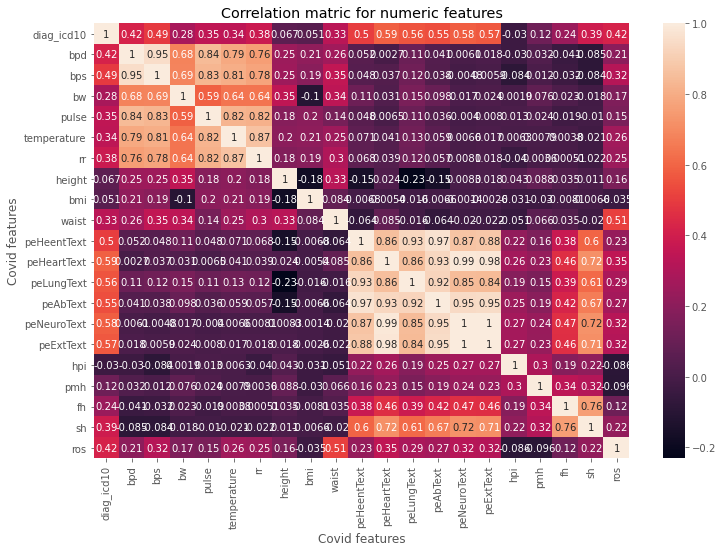

diag_icd10     1.000000
bpd            0.420625
bps            0.494478
bw             0.283194
pulse          0.347699
temperature    0.342916
rr             0.384081
height         0.066755
bmi            0.050525
waist          0.333436
peHeentText    0.500170
peHeartText    0.587891
peLungText     0.560645
peAbText       0.547320
peNeuroText    0.584264
peExtText      0.570658
hpi           -0.029874
pmh            0.120128
fh             0.240467
sh             0.390522
ros            0.421868
dtype: float64

In [18]:
#Correlation visitviatal table

for col_name in ['bpd','bps','bw','pulse','temperature','rr','height','bmi','waist']:
    #visitvitaldata[col_name] = visitvitaldata[col_name].convert_dtypes()
    visitvitaltable[col_name] = pd.to_numeric(visitvitaltable[col_name],errors='coerce')

df_numerizedvis = visitvitaltable

for col_name in ['cc','hr','pe','fbs','o2sat','prePainScore','postPainScore',
                 'peGa','peHeent','peHeart','peLung','peAb','peExt','peNeuro',
                 'peGaText','dtx1','dtx2','ptPriorityId','ptPriorityName']:
    del df_numerizedvis[col_name]
for col_name in df_numerizedvis.columns:
    if(df_numerizedvis[col_name].dtype == 'object'):
        df_numerizedvis[col_name] = df_numerizedvis[col_name].astype('category')
        df_numerizedvis[col_name] = df_numerizedvis[col_name].cat.codes
        
correlation_matrixvis = df_numerizedvis.corr()
sns.heatmap(correlation_matrixvis, annot = True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Covid features')
plt.ylabel('Covid features')
plt.show()

correlation_matvis = df_numerizedvis.corr()
corr_pairsvis = correlation_matvis.unstack()
corr_pairsvis['diag_icd10']

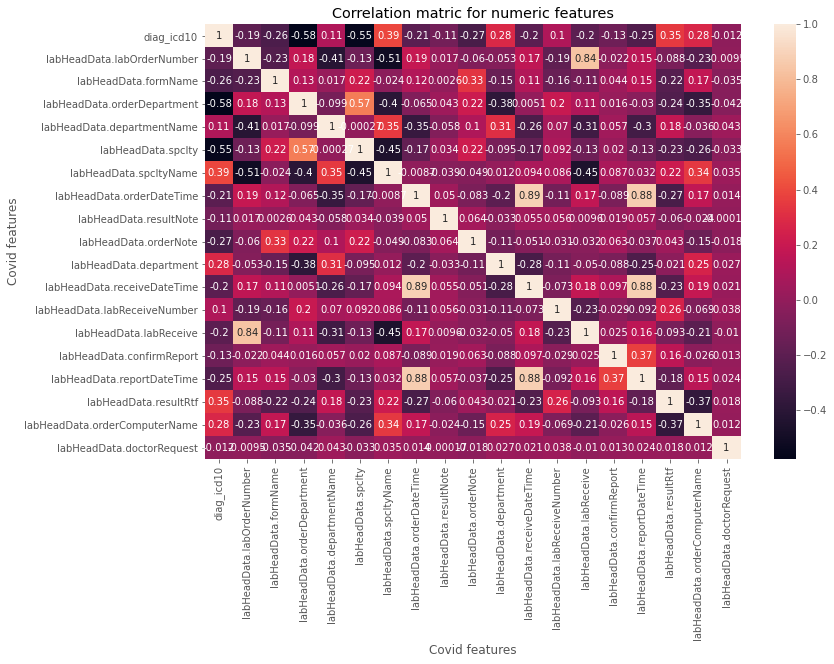

diag_icd10                       1.000000
labHeadData.labOrderNumber      -0.189490
labHeadData.formName            -0.261580
labHeadData.orderDepartment     -0.577247
labHeadData.departmentName       0.110697
labHeadData.spclty              -0.549743
labHeadData.spcltyName           0.390643
labHeadData.orderDateTime       -0.205140
labHeadData.resultNote          -0.112012
labHeadData.orderNote           -0.274392
labHeadData.department           0.284790
labHeadData.receiveDateTime     -0.201835
labHeadData.labReceiveNumber     0.101748
labHeadData.labReceive          -0.195801
labHeadData.confirmReport       -0.132252
labHeadData.reportDateTime      -0.250236
labHeadData.resultRtf            0.351267
labHeadData.orderComputerName    0.277025
labHeadData.doctorRequest       -0.012374
dtype: float64

In [19]:
#Correlation labresults table

for col_name in ['labHeadData.labOrderNumber','labHeadData.labReceiveNumber']:
    labresultstable[col_name] = pd.to_numeric(labresultstable[col_name],errors='coerce')

df_numerizedlab = labresultstable

for col_name in ['labReportData']:
    del df_numerizedlab[col_name]
for col_name in df_numerizedlab.columns:
    if(df_numerizedlab[col_name].dtype == 'object'):
        df_numerizedlab[col_name] = df_numerizedlab[col_name].astype('category')
        df_numerizedlab[col_name] = df_numerizedlab[col_name].cat.codes
        
correlation_matrixlab = df_numerizedlab.corr()
sns.heatmap(correlation_matrixlab, annot = True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Covid features')
plt.ylabel('Covid features')
plt.show()

correlation_matlab = df_numerizedlab.corr()
corr_pairslab = correlation_matlab.unstack()
corr_pairslab['diag_icd10']

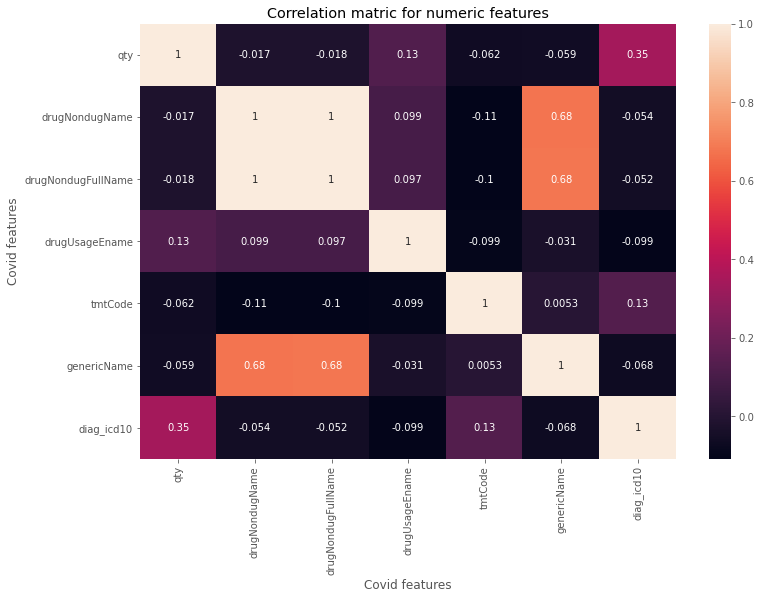

qty                   0.346248
drugNondugName       -0.054313
drugNondugFullName   -0.052087
drugUsageEname       -0.099413
tmtCode               0.133000
genericName          -0.067840
diag_icd10            1.000000
dtype: float64

In [20]:
#Correlation drugs table

for col_name in ['qty']:
    drugstable[col_name] = pd.to_numeric(drugstable[col_name],errors='coerce')

df_numerizeddrug = drugstable

for col_name in df_numerizeddrug.columns:
    if(df_numerizeddrug[col_name].dtype == 'object'):
        df_numerizeddrug[col_name] = df_numerizeddrug[col_name].astype('category')
        df_numerizeddrug[col_name] = df_numerizeddrug[col_name].cat.codes
        
correlation_matrixdrug = df_numerizeddrug.corr()
sns.heatmap(correlation_matrixdrug, annot = True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Covid features')
plt.ylabel('Covid features')
plt.show()

correlation_matdrug = df_numerizeddrug.corr()
corr_pairsdrug = correlation_matdrug.unstack()
corr_pairsdrug['diag_icd10']

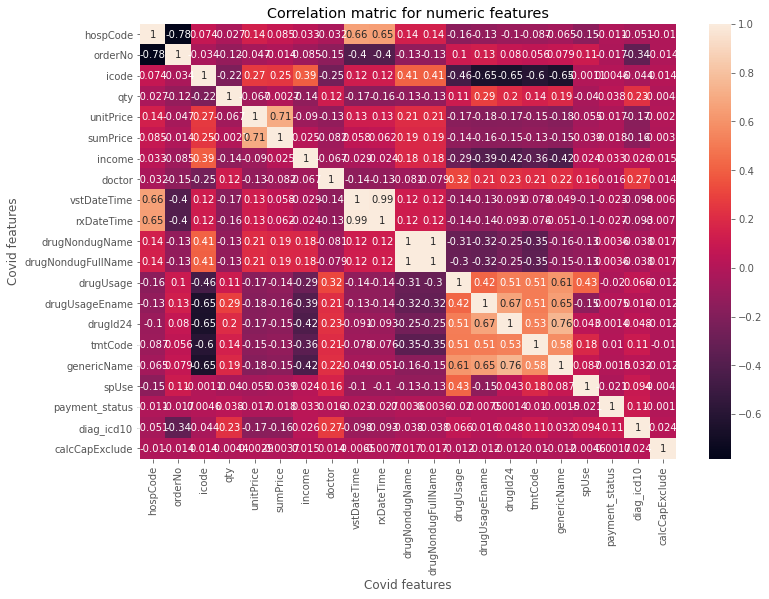

hospCode             -0.050502
orderNo              -0.337165
icode                -0.044466
qty                   0.228117
unitPrice            -0.169221
sumPrice             -0.159279
income                0.025918
doctor                0.269040
vstDateTime          -0.097738
rxDateTime           -0.093385
drugNondugName       -0.038203
drugNondugFullName   -0.038321
drugUsage             0.065703
drugUsageEname        0.016209
drugId24              0.048346
tmtCode               0.106556
genericName           0.032448
spUse                 0.093797
payment_status        0.107609
diag_icd10            1.000000
calcCapExclude        0.023825
dtype: float64

In [21]:
#Correlation billingitems table

for col_name in ['qty','unitPrice','sumPrice','orderNo']:
    billingitemstable[col_name] = pd.to_numeric(billingitemstable[col_name],errors='coerce')

df_numerizedbill = billingitemstable

for col_name in ['consultStatus','itemsNoteText','itemsNoteUser','spName','iptOrderId',
                 'orderType','ward','orderLocked','financeNumber','payStaffStatus',
                 'payStaff','payStaffName','items_type','billingStatus','comments',
                 'itemsNoteDateTime','calcPrice','calcItemRule','finalPrice','calcTimestamp']:
    del df_numerizedbill[col_name]

for col_name in df_numerizedbill.columns:
    if(df_numerizedbill[col_name].dtype == 'object'):
        df_numerizedbill[col_name] = df_numerizedbill[col_name].astype('category')
        df_numerizedbill[col_name] = df_numerizedbill[col_name].cat.codes
        
correlation_matrixbill = df_numerizedbill.corr()
sns.heatmap(correlation_matrixbill, annot = True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Covid features')
plt.ylabel('Covid features')
plt.show()

correlation_matbill = df_numerizedbill.corr()
corr_pairsbill = correlation_matbill.unstack()
corr_pairsbill['diag_icd10']

# Analysis correlation

In [22]:
#Filter from high correlation

corr_pair_main = corr_pairs['diag_icd10']
for corr_name in [corr_pairsvis, corr_pairslab, corr_pairsdrug, corr_pairsbill]:
    corr_pair_main = corr_pair_main.append(corr_name['diag_icd10'])

sorted_corr = corr_pair_main.sort_values()
high_corr_neg = sorted_corr[sorted_corr < -0.4]
high_corr_pos = sorted_corr[sorted_corr > 0.4]
high_corr_posno1 = high_corr_pos[high_corr_pos != 1]
high_corr = pd.concat([high_corr_neg, high_corr_posno1])
high_corr

class                         -0.607601
labHeadData.orderDepartment   -0.577247
patientareacode               -0.554628
labHeadData.spclty            -0.549743
visitid                        0.404889
bpd                            0.420625
ros                            0.421868
visitage                       0.489686
bps                            0.494478
peHeentText                    0.500170
peAbText                       0.547320
peLungText                     0.560645
peExtText                      0.570658
peNeuroText                    0.584264
peHeartText                    0.587891
network                        0.800585
dtype: float64

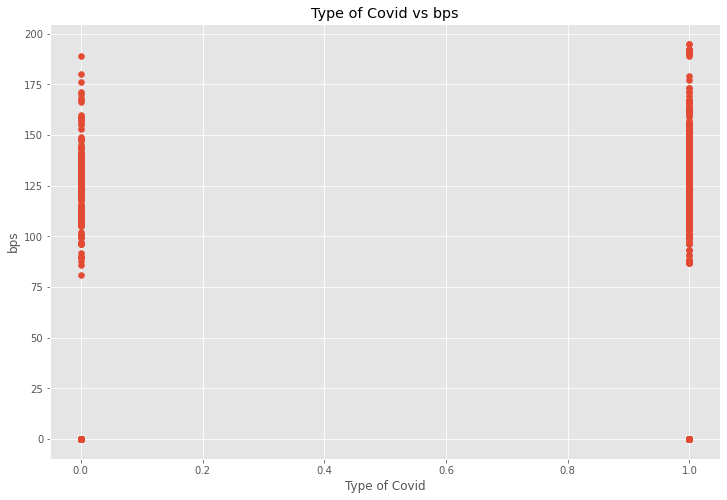

In [23]:
#Scatter graph

plt.scatter(x = df_numerizedvis['diag_icd10'], y = df_numerizedvis['bps'])
plt.title('Type of Covid vs bps')
plt.xlabel('Type of Covid')
plt.ylabel('bps')
plt.show()

Note : In diag_icd10, zero means U071 and one means not U071

<AxesSubplot:xlabel='diag_icd10', ylabel='bps'>

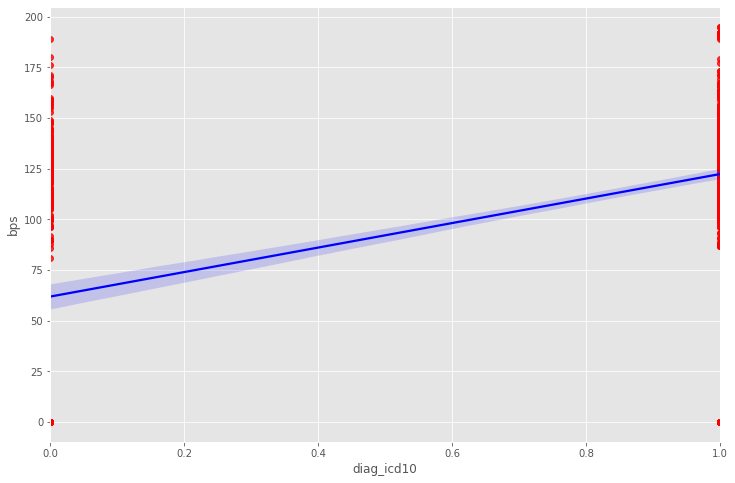

In [24]:
#Reg plot

sns.regplot(x = 'diag_icd10', y = 'bps', data = df_numerizedvis, 
            scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

<AxesSubplot:xlabel='diag_icd10', ylabel='class'>

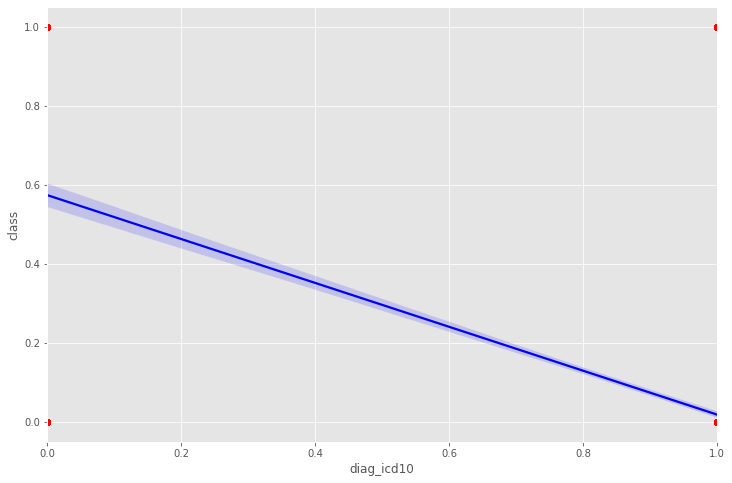

In [25]:
sns.regplot(x = 'diag_icd10', y = 'class', data = df_numerized, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

Note : In class, zero means AMB and one means IMP

<AxesSubplot:xlabel='diag_icd10', ylabel='network'>

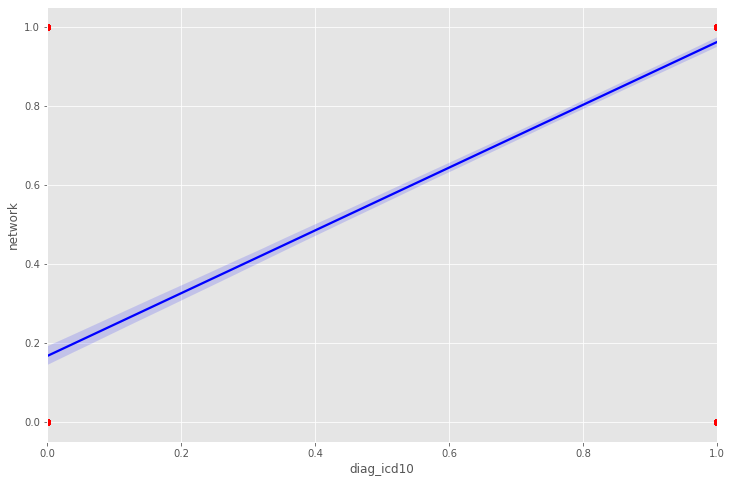

In [26]:
sns.regplot(x = 'diag_icd10', y = 'network', data = df_numerized, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

Note : In network, zero means CSS and one means not SMPK